In [1]:
'''
__author__ = 'Alex Cheng'
惩罚回归系数控制过拟合-岭回归（L2）
让系数变小，而不是将其中一些系数设定为0
alpha一系列值按照10的倍数递减，通过不同值来控制模型数量
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from math import sqrt

In [2]:
target_url3 = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
"wine-quality/winequality-red.csv")
df = pd.read_csv(target_url3,header=0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
labels = [i for i in df.iloc[:,-1]] # 最后一列就是label

# 将属性矩阵和标签向量2/3训练，1/3测试
indices = len(df) # len表示df有多少行，for循环时是多少列
df.iloc[:,-1].value_counts() # M:111, R:97
xTrain = np.array(df[df.index % 3 != 0].iloc[:,:-1]) # dataframe转为numpy数组
#yTrain = np.array(df[df.index % 3 != 0].iloc[:,-1])
yTrain = np.array([labels[i] for i in df.index if i%3 !=0])
xTest =  np.array(df[df.index % 3 == 0].iloc[:,:-1])
yTest =  np.array([labels[i] for i in df.index if i%3 ==0])

In [11]:
alphaList = [0.1 ** i for i in range(7)]
rmsError = []
for alph in alphaList:
    wineModel = linear_model.Ridge(alpha = alph)
    wineModel.fit(xTrain,yTrain)
    predTest = wineModel.predict(xTest)
    rmsError.append(np.linalg.norm((yTest-predTest),2) / sqrt(len(yTest)))

for i in range(len(rmsError)):
    print(rmsError[i],alphaList[i])

0.6595788176342458 1.0
0.6578610918808592 0.1
0.6576172144640244 0.010000000000000002
0.6575216482641756 0.0010000000000000002
0.6574190680109292 0.00010000000000000002
0.6573941628851251 1.0000000000000003e-05
0.6573913087155857 1.0000000000000004e-06


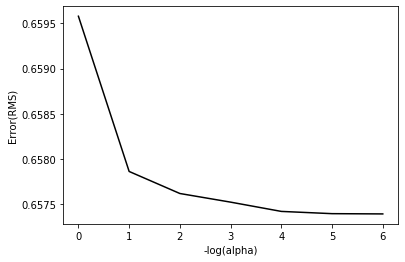

In [12]:
# plot curve of out-sample error vs alpha
x = range(len(rmsError))
plt.plot(x,rmsError,'k')
plt.xlabel('-log(alpha)') # x负对数变化
plt.ylabel('Error(RMS)')
plt.show()

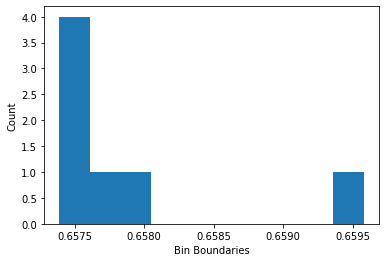

In [17]:
# plot histogram of out-sample error vs alpha
# plot curve of out-sample error vs alpha
x = range(len(rmsError))
plt.hist(rmsError)
plt.xlabel('Bin Boundaries') # x负对数变化
plt.ylabel('Count')
plt.show()

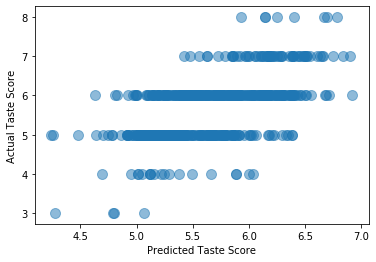

In [19]:
# scatter plot of actucl vs predicted
plt.scatter(wineModel.predict(xTest),yTest,s=100,alpha=0.5) # size散点大小
plt.xlabel("Predicted Taste Score")
plt.ylabel("Actual Taste Score")
plt.show()

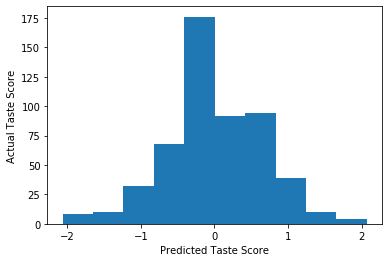

In [22]:
indexBest = rmsError.index(min(rmsError))
alph = alphaList[indexBest]
wineModel = linear_model.Ridge(alpha=alph)
wineModel.fit(xTrain,yTrain)
errorVector = yTest-wineModel.predict(xTest)
plt.hist(errorVector)
plt.xlabel("Predicted Taste Score")
plt.ylabel("Actual Taste Score")
plt.show()